<div style="text-align: center; padding: 20px; border-radius: 15px; background-color: #fff8ff; color: #333333; border: 2px solid #444555; font-family: Arial, sans-serif;">
  <h1 style="font-size: 2.5em; font-weight: bold; margin: 10px 0; color: #444555;">Lung Cancer Prediction & Model Comparison</h1>
</div>

<div style="padding: 20px; border-radius: 15px; background-color: #fff8ff; color: #333333; border: 2px solid #444555; font-family: Arial, sans-serif;">
In this project, we will conduct an extensive data analysis and create visualizations to explore patterns and insights within the Lung Cancer Dataset. Following this, we will perform a comprehensive comparison of multiple machine learning algorithms, evaluating their performance metrics to identify the most effective model for accurately detecting lung cancer. This approach aims to ensure a robust understanding of the df and deliver the best possible predictive outcomes.
</div>

## 1. Import Libraries

In [1]:
#Matrix Calculation
import numpy as np 

#Data Manipulation
import pandas as pd 

#To Plot Graphs
import matplotlib.pyplot as plt 

#Statistical Visualization 
import seaborn as sns

In [2]:
#Read CSV FILE and copy it into the variable
df=pd.read_csv("../input/lung-cancer/survey lung cancer.csv")

In [3]:
#Know rows and columns
df.shape

(309, 16)

In [4]:
#Check Data
df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


In [5]:
#Print Columns
df.columns

Index(['GENDER', 'AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY',
       'PEER_PRESSURE', 'CHRONIC DISEASE', 'FATIGUE ', 'ALLERGY ', 'WHEEZING',
       'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH',
       'SWALLOWING DIFFICULTY', 'CHEST PAIN', 'LUNG_CANCER'],
      dtype='object')

In [6]:
#Get to know the data types that exist in data
df.dtypes

GENDER                   object
AGE                       int64
SMOKING                   int64
YELLOW_FINGERS            int64
ANXIETY                   int64
PEER_PRESSURE             int64
CHRONIC DISEASE           int64
FATIGUE                   int64
ALLERGY                   int64
WHEEZING                  int64
ALCOHOL CONSUMING         int64
COUGHING                  int64
SHORTNESS OF BREATH       int64
SWALLOWING DIFFICULTY     int64
CHEST PAIN                int64
LUNG_CANCER              object
dtype: object

In [7]:
#Summary of data
df.describe()

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
count,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000
mean,62.673139,1.563107,1.569579,1.498382,1.501618,1.504854,1.673139,1.556634,1.556634,1.556634,1.579288,1.640777,1.469256,1.556634
std,8.210301,0.496806,0.495938,0.500808,0.500808,0.500787,0.469827,0.497588,0.497588,0.497588,0.494474,0.480551,0.499863,0.497588
min,21.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,57.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,62.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000
75%,69.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
max,87.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


In [8]:
#See Missing Values
df.isnull().sum()

GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
dtype: int64

## 2. Data Preprocessing

In [9]:
#Case Formatting
df.columns=df.columns.str.title()

In [10]:
#Check Fomatting
df.head(10)

,Gender,Age,Smoking,Yellow_Fingers,Anxiety,Peer_Pressure,Chronic Disease,Fatigue,Allergy,Wheezing,Alcohol Consuming,Coughing,Shortness Of Breath,Swallowing Difficulty,Chest Pain,Lung_Cancer
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO
5,F,75,1,2,1,1,2,2,2,2,1,2,2,1,1,YES
6,M,52,2,1,1,1,1,2,1,2,2,2,2,1,2,YES
7,F,51,2,2,2,2,1,2,2,1,1,1,2,2,1,YES
8,F,68,2,1,2,1,1,2,1,1,1,1,1,1,1,NO
9,M,53,2,2,2,2,2,1,2,1,2,1,1,2,2,YES


In [11]:
#Check Formatting
df.columns

Index(['Gender', 'Age', 'Smoking', 'Yellow_Fingers', 'Anxiety',
       'Peer_Pressure', 'Chronic Disease', 'Fatigue ', 'Allergy ', 'Wheezing',
       'Alcohol Consuming', 'Coughing', 'Shortness Of Breath',
       'Swallowing Difficulty', 'Chest Pain', 'Lung_Cancer'],
      dtype='object')

In [12]:
#Change data for better understanding
df["Gender"]=df["Gender"].replace(["M","F"],["Male","Female"])

#Replace 1&2 with 0&1 for better understanding
col=["Smoking","Yellow_Fingers","Anxiety","Peer_Pressure","Chronic Disease","Fatigue ","Allergy ","Wheezing","Alcohol Consuming","Coughing","Shortness Of Breath","Swallowing Difficulty","Chest Pain"]
for x in col:
        df[x]=df[x].replace([1,2],[0,1])

In [13]:
#Verify Changes
df.head(10)

,Gender,Age,Smoking,Yellow_Fingers,Anxiety,Peer_Pressure,Chronic Disease,Fatigue,Allergy,Wheezing,Alcohol Consuming,Coughing,Shortness Of Breath,Swallowing Difficulty,Chest Pain,Lung_Cancer
0,Male,69,0,1,1,0,0,1,0,1,1,1,1,1,1,YES
1,Male,74,1,0,0,0,1,1,1,0,0,0,1,1,1,YES
2,Female,59,0,0,0,1,0,1,0,1,0,1,1,0,1,NO
3,Male,63,1,1,1,0,0,0,0,0,1,0,0,1,1,NO
4,Female,63,0,1,0,0,0,0,0,1,0,1,1,0,0,NO
5,Female,75,0,1,0,0,1,1,1,1,0,1,1,0,0,YES
6,Male,52,1,0,0,0,0,1,0,1,1,1,1,0,1,YES
7,Female,51,1,1,1,1,0,1,1,0,0,0,1,1,0,YES
8,Female,68,1,0,1,0,0,1,0,0,0,0,0,0,0,NO
9,Male,53,1,1,1,1,1,0,1,0,1,0,0,1,1,YES


In [14]:
#Print whole table
df

,Gender,Age,Smoking,Yellow_Fingers,Anxiety,Peer_Pressure,Chronic Disease,Fatigue,Allergy,Wheezing,Alcohol Consuming,Coughing,Shortness Of Breath,Swallowing Difficulty,Chest Pain,Lung_Cancer
0,Male,69,0,1,1,0,0,1,0,1,1,1,1,1,1,YES
1,Male,74,1,0,0,0,1,1,1,0,0,0,1,1,1,YES
2,Female,59,0,0,0,1,0,1,0,1,0,1,1,0,1,NO
3,Male,63,1,1,1,0,0,0,0,0,1,0,0,1,1,NO
4,Female,63,0,1,0,0,0,0,0,1,0,1,1,0,0,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,Female,56,0,0,0,1,1,1,0,0,1,1,1,1,0,YES
305,Male,70,1,0,0,0,0,1,1,1,1,1,1,0,1,YES
306,Male,58,1,0,0,0,0,0,1,1,1,1,0,0,1,YES
307,Male,67,1,0,1,0,0,1,1,0,1,1,1,0,1,YES


## 3. Data Visualization

In [15]:
#Identify Genders
df["Gender"].unique()

array(['Male', 'Female'], dtype=object)

In [16]:
#Identify number of males and females in records
gen_count=df["Gender"].value_counts()
gen_count

Male      162
Female    147
Name: Gender, dtype: int64

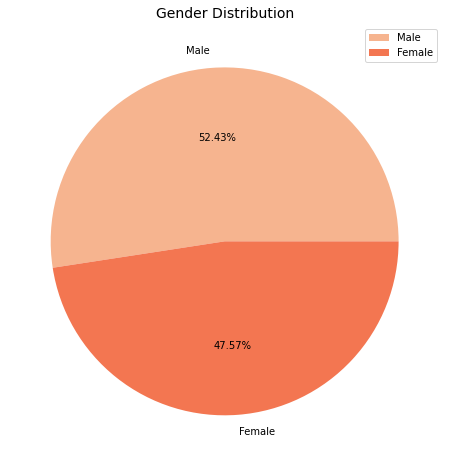

In [17]:
#Plotting a pie chart for gender distribution

plt.figure(figsize=(10,8))
values=gen_count.values
labels=gen_count.index
plt.pie(values,labels=labels,autopct='%1.2f%%',colors=sns.color_palette('rocket_r'))
plt.title("Gender Distribution",fontsize='14')
plt.legend(["Male","Female"])
plt.show()

Text(0.5, 1.0, 'Gender Vs. Lung Cancer')

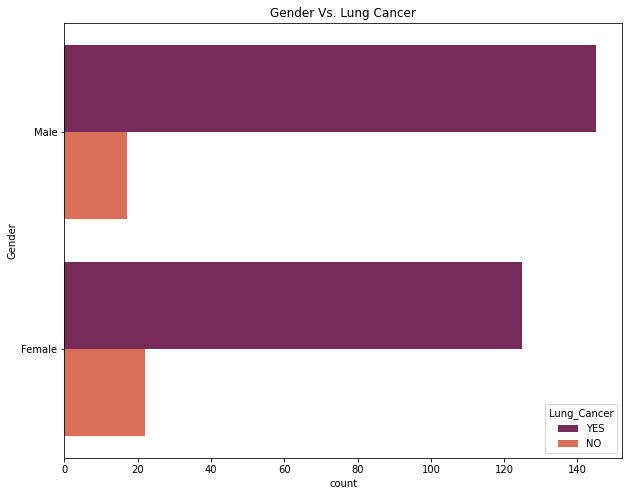

In [18]:
#Plot Chart for Group Data Distribution
plt.figure(figsize=(10,8))
sns.countplot(data=df,y="Gender",hue="Lung_Cancer",palette=('rocket'))
plt.title("Gender Vs. Lung Cancer")

<div style="text-align:center;padding: 20px; border-radius: 15px; background-color: #fff8ff; color: #333333; border: 2px solid #444555; font-family: Arial, sans-serif;">
Lets Identify the Relations with  Age factor
</div>

In [19]:
#Data in group for genders
df.groupby(["Gender","Lung_Cancer"]).agg(Count=("Lung_Cancer","count"),Minimum_Age=("Age","min"),Maximum_Age=("Age","max")).reset_index()

,Gender,Lung_Cancer,Count,Minimum_Age,Maximum_Age
0,Female,NO,22,21,87
1,Female,YES,125,38,81
2,Male,NO,17,46,69
3,Male,YES,145,39,79


In [20]:
print("Minimum age in Dataset is",df["Age"].min()),
print("Maxium age in Dataset is",df["Age"].max())

Minimum age in Dataset is 21
Maxium age in Dataset is 87


In [21]:
#Store agewise records for better access
df.loc[(df['Age'] >= 0) & (df["Age"] <= 9),"n_age"]="In 0's"
df.loc[(df['Age'] >= 10) & (df["Age"] <= 19),"n_age"]="In 10's"
df.loc[(df['Age'] >= 20) & (df["Age"] <= 29),"n_age"]="In 20's"
df.loc[(df['Age'] >= 30) & (df["Age"] <= 39),"n_age"]="In 30's"
df.loc[(df['Age'] >= 40) & (df["Age"] <= 49),"n_age"]="In 40's"
df.loc[(df['Age'] >= 50) & (df["Age"] <= 59),"n_age"]="In 50's"
df.loc[(df['Age'] >= 60) & (df["Age"] <= 69),"n_age"]="In 60's"
df.loc[(df['Age'] >= 70) & (df["Age"] <= 79),"n_age"]="In 70's"
df.loc[(df['Age'] >= 80) & (df["Age"] <= 89),"n_age"]="In 80's"

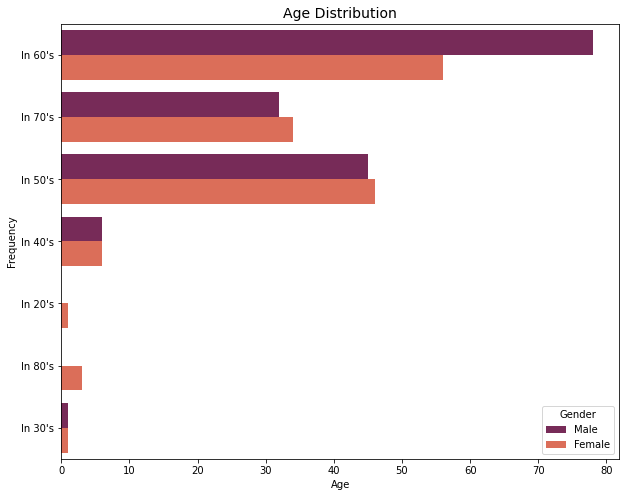

In [22]:
#Plot chart for age distribution
plt.figure(figsize=(10,8))
sns.countplot(y="n_age",hue="Gender",data=df,palette=('rocket'))

#Details
plt.title("Age Distribution",fontsize='14')
plt.xlabel("Age")
plt.ylabel("Frequency")

#Print
plt.show()

<div style="text-align:center;padding: 20px; border-radius: 15px; background-color: #fff8ff; color: #333333; border: 2px solid #444555; font-family: Arial, sans-serif;">
Lets Identify the Relations with  Alchohol Consumption
</div>

In [23]:
#identify all types of unique values present in column "Alcohol Consuming"
df["Alcohol Consuming"].unique()

array([1, 0])

In [24]:
#Find the number of people who drink and those who don't
alcohol_con=df["Alcohol Consuming"].value_counts(sort=True)
alcohol_con

1    172
0    137
Name: Alcohol Consuming, dtype: int64

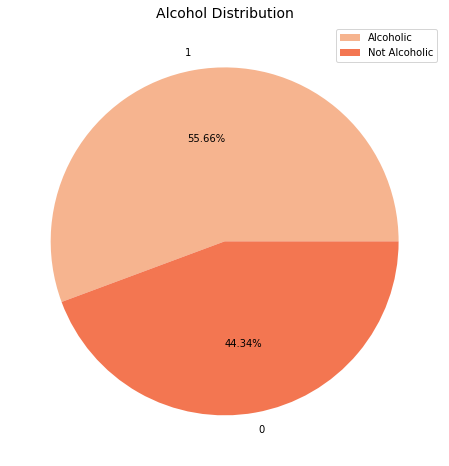

In [25]:
#Plot Alochol Disyrubution using Pie Chart
labels=alcohol_con.index
values=alcohol_con.values
plt.figure(figsize=(10,8))
plt.pie(values,labels=labels,autopct='%1.2f%%',colors=sns.color_palette('rocket_r'))
plt.title("Alcohol Distribution",fontsize='14')
plt.legend(["Alcoholic","Not Alcoholic"]) #To print ref box
plt.show()

In [26]:
#Build Table to see the impact of alcohol Consumption on Lung Cancer
alco_table=df.groupby(["Alcohol Consuming","Lung_Cancer"]).agg(Total=("Lung_Cancer","count")).reset_index()
alco_table

,Alcohol Consuming,Lung_Cancer,Total
0,0,NO,32
1,0,YES,105
2,1,NO,7
3,1,YES,165


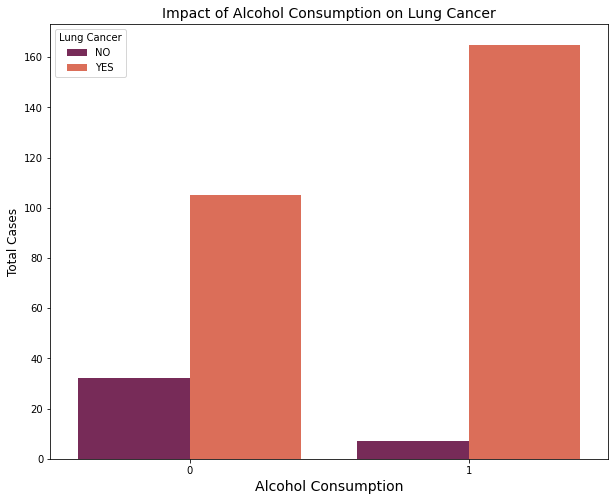

In [27]:
#Plot chart for age distribution
plt.figure(figsize=(10,8))
sns.barplot(x='Alcohol Consuming',y="Total",hue="Lung_Cancer",data=alco_table,palette=('rocket'))

#Details
plt.title("Impact of Alcohol Consumption on Lung Cancer", fontsize=14)
plt.xlabel("Alcohol Consumption", fontsize=14)
plt.ylabel("Total Cases", fontsize=12)
plt.legend(title="Lung Cancer", fontsize=10)

#Print
plt.show()

<div style="text-align:center;padding: 20px; border-radius: 15px; background-color: #fff8ff; color: #333333; border: 2px solid #444555; font-family: Arial, sans-serif;">
From the above chart, we can infer that alcohol consumption has a minor connection with lung cancer, as the distribution between those who consume alcohol and those who don't is quite similar. While there may be a slight impact, it is likely that alcohol consumption, when combined with other factors, could contribute more significantly to the risk of lung cancer.
</div>

In [28]:
#Build table to display lung cancer distribution - agewise
df.groupby(["n_age","Lung_Cancer"]).agg(Total=("Lung_Cancer","count")).reset_index()

,n_age,Lung_Cancer,Total
0,In 20's,NO,1
1,In 30's,YES,2
2,In 40's,NO,2
3,In 40's,YES,10
4,In 50's,NO,13
5,In 50's,YES,78
6,In 60's,NO,20
7,In 60's,YES,114
8,In 70's,NO,2
9,In 70's,YES,64


## 4.Machine learning

### 1. Import Libraries

In [29]:
#Machine Learining using Logistic Regression

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,precision_score,recall_score
from sklearn.metrics import mean_absolute_error, mean_squared_error

### 2. Data Preprocessing

In [30]:
#Data should be in a binary for efficient performance. 
#We replace Genders and Lung Cancer coulmn values with 1 and 0
#Other values were replaced earlier.

df["Gender"]=df["Gender"].replace(["Male","Female"],[1,0])
df["Lung_Cancer"]=df["Lung_Cancer"].replace(["YES","NO"],[1,0])

### 3. Data splitting for better data validation and output

In [31]:
X = df.iloc[:, :-2].values #Select all the Rows Except Last Two Columns
y = df.iloc[:, -2].values #Select all the Rows of Last Column

In [32]:
#Data Split using test_train_split fuction
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [33]:
#Print the splitted output values
y_test

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [34]:
#Call function for model training
lr=LogisticRegression(penalty="l2",C=1.0,solver="liblinear",random_state=42)
lr.fit(X_train,y_train)

LogisticRegression(random_state=42, solver='liblinear')

In [35]:
#Predict the values
predicted_value=lr.predict(X_test)
predicted_value

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

### 4.Model Evalution

In [36]:
print("Performance Metrics for Logistic Regression\n")
print("Accuracy score: ",accuracy_score(y_test,predicted_value))
print("Precision score: ",precision_score(y_test,predicted_value))
print("Recall score: ",recall_score(y_test,predicted_value))
print("Mean Absolute Error: ",mean_absolute_error(y_test,predicted_value))
print("Mean Squared Error: ",mean_squared_error(y_test,predicted_value))

Performance Metrics for Logistic Regression

Accuracy score:  0.967741935483871
Precision score:  0.9833333333333333
Recall score:  0.9833333333333333
Mean Absolute Error:  0.03225806451612903
Mean Squared Error:  0.03225806451612903


<div style="text-align:center;padding: 20px; border-radius: 15px; background-color: #fff8ff; color: #333333; border: 2px solid #444555; font-family: Arial, sans-serif;">
Lets check outputs using the Random Forrest Algorithm Now
</div>

In [37]:
#Import Library
from sklearn.ensemble import RandomForestRegressor

In [38]:
#Include all columns except prediction column and n_age which was made for better insights.
rf_X=df.drop(["Lung_Cancer","n_age"],axis=1)

#Preiction Column
rf_y=df["Lung_Cancer"]

In [39]:
#Data Split using test_train_split fuction
rf_xtrain,rf_xtest,rf_ytrain,rf_ytest=train_test_split(rf_X,rf_y,test_size=0.2,random_state=42)

In [40]:
#Print the splitted output values
rf_ytest

288    1
9      1
57     1
60     1
25     1
      ..
198    1
195    1
210    1
224    1
158    1
Name: Lung_Cancer, Length: 62, dtype: int64

In [41]:
#Implement Model
forest_model = RandomForestRegressor(random_state=42)
forest_model.fit(rf_xtrain, rf_ytrain)
forest_predict = forest_model.predict(rf_xtest)
forest_predict

array([0.97      , 0.99      , 1.        , 1.        , 1.        ,
       0.91      , 0.97      , 1.        , 0.91      , 0.89333333,
       0.97933333, 1.        , 0.99      , 0.90933333, 1.        ,
       0.82      , 1.        , 0.67      , 0.97      , 0.87      ,
       0.59      , 1.        , 0.76      , 0.93666667, 1.        ,
       0.89      , 0.84      , 0.71      , 0.99      , 1.        ,
       0.91      , 0.84      , 1.        , 0.96      , 1.        ,
       1.        , 0.99      , 0.98      , 0.78      , 1.        ,
       0.95      , 1.        , 1.        , 0.9       , 1.        ,
       0.935     , 0.97      , 0.96      , 0.12      , 1.        ,
       0.9       , 0.92      , 1.        , 0.99      , 1.        ,
       0.96      , 1.        , 0.83      , 0.95666667, 0.86933333,
       1.        , 1.        ])

### Model Evaluation

In [42]:
forest_predict_binary = (forest_predict >= 0.5).astype(int)

In [43]:
print("Performance Metrics for Random Forest\n")

print("Accuracy score: ",accuracy_score(rf_ytest,forest_predict_binary))
print("Precision score: ",precision_score(rf_ytest,forest_predict_binary))
print("Recall score: ",recall_score(rf_ytest,forest_predict_binary))
print("Mean Absolute Error: ",mean_absolute_error(rf_ytest,forest_predict_binary))
print("Mean Squared Error: ",mean_squared_error(rf_ytest,forest_predict_binary))

Performance Metrics for Random Forest

Accuracy score:  0.9838709677419355
Precision score:  0.9836065573770492
Recall score:  1.0
Mean Absolute Error:  0.016129032258064516
Mean Squared Error:  0.016129032258064516


## 5.Performance Comparison: Random Forest vs. Logistic Regression

<div style="padding: 20px; border-radius: 15px; background-color: #fff8ff; color: #333333; border: 2px solid #444555; font-family: Arial, sans-serif;">

1. Accuracy Score<br>
Random Forest: 98.39%<br>
Logistic Regression: 96.77%<br>
Observation: Random Forest outperforms Logistic Regression in terms of overall accuracy, meaning it is better at correctly classifying both positive and negative instances.
<br><br>2. Precision Score<br>
Random Forest: 98.36%<br>
Logistic Regression: 98.33%<br>
Observation: Both models perform very similarly in precision, meaning when they predict a positive case, they are almost equally likely to be correct.
<br><br>3. Recall Score<br>
Random Forest: 100%<br>
Logistic Regression: 98.33%<br>
Observation: Random Forest has perfect recall, meaning it does not miss any positive cases, while Logistic Regression misses a few.
<br><br>4. Mean Absolute Error (MAE)<br>
Random Forest: 1.61%<br>
Logistic Regression: 3.23%<br>
Observation: Random Forest has a lower MAE, meaning its predictions are generally closer to the true values.
<br><br>5. Mean Squared Error (MSE)<br>
Random Forest: 1.61%<br>
Logistic Regression: 3.23%<br>
Observation: Random Forest also performs better with a lower MSE, suggesting that its predictions are more accurate overall and have smaller errors.

</div>

## 6. Conclusion



<div style="padding: 20px; border-radius: 15px; background-color: #fff8ff; color: #333333; border: 2px solid #444555; font-family: Arial, sans-serif;">

Random Forest outperforms Logistic Regression across all key metrics (accuracy, recall, MAE, and MSE), making it the better choice for this dataset.

Perfect recall (1.0) with Random Forest ensures it detects all lung cancer cases without missing any.
It also has higher accuracy and lower error metrics.
Logistic Regression still performs well, especially in terms of precision, but it lags behind in recall, meaning it may miss some true positive cases.

However, it's important to note that this comparison is based on a relatively small dataset, which limits the robustness of the results. In practice, larger datasets would require additional considerations, such as feature scaling, data encoding, and other techniques, to improve the model's performance and generalizability.

While Random Forest outperforms Logistic Regression in this case with higher accuracy, recall, and lower error metrics, these results might change with a larger dataset, where more extensive preprocessing and feature engineering would be necessary. This notebook is a great starting point for understanding data preprocessing, machine learning modeling, and visualization techniques using libraries like NumPy, Pandas, Seaborn, and Matplotlib.

In summary, while the comparison here offers valuable insights, larger datasets with more complex features would require further refinement for optimal results.

</div>

<div style="background-color: #fff8ff; padding: 20px; border-radius: 10px; border: 1px solid #444555; font-family: Arial, sans-serif; color: #333333;">

  <h3 style="color: #444555; font-weight: bold;">If you found this notebook helpful, consider giving it an upvote! 👍</h3>
  <p style="font-size: 1.1em; color: #555555;">Your support encourages continued work in this domain. Feel free to leave your thoughts, feedback, or suggestions in the comments section. Let’s collaborate to make data science impactful!</p>

</div>